# Installing Markov Generator

In [2]:
!pip install markovify


   ---------------------------------------- 0/2 [unidecode]
   ---------------------------------------- 2/2 [markovify]



# Importing The Libraries and Reading Data

In [3]:
import pandas as pd 
import markovify 

In [4]:
data = pd.read_csv(r"text_data.csv")
df = data.copy()
df.head(5)

,publish_date,headline_text
0,20030219,aba decides against community broadcasting lic...
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit
3,20030219,air nz staff in aust strike for pay rise
4,20030219,air nz strike to affect australian travellers


## Seeing some Random Headlines from the dataframe

In [7]:
import random
df.headline_text[random.sample(range(100), 10)]

9           australia is locked into war timetable opp
63        griffiths under fire over project knock back
67    hanson should go back where she came from nsw mp
1       act fire witnesses must be aware of defamation
72                 inquest finds mans death accidental
53                     funds announced for bridge work
24                        cemeteries miss out on funds
94                     mayor warns landfill protesters
51       funds allocated for domestic violence victims
17      british combat troops arriving daily in kuwait
Name: headline_text, dtype: object

# Building the Text Model With Markov Chain

In [8]:
text_model = markovify.NewlineText(df.headline_text,state_size= 2)

## Have Some Fun With Uncle Markov 😂😂😂

In [10]:
for i in range(10):
    print(text_model.make_sentence())

euthansia advocate philip nitschke on euthanasia issue
second graduate for mandatory lights on giant solar towers height
coronavirus australia live updates will trump allow release of sediment near barrier reef sustainability report
forestry deadline unlikely to create silo art most northern sign
power transport networks hit by car in front at break
new maningrida morgue facility not base for fish kill
ousted thai pm to stand despite race collapse
activists smuggle usb sticks with trimester system at breaking point union says grollo refused compromise offer
white washed stories of australian pm to step down trump says respect for journos
separate politicians from legal loophole may set dangerous precedent editor


In [11]:
text_model2 = markovify.NewlineText(df.headline_text,state_size= 3)
text_model3 = markovify.NewlineText(df.headline_text,state_size= 4)

In [14]:
for i in range(5):
    print(text_model2.make_sentence())

trio arrested in south hedland
bush nominates new homeland security dept unlikely
tony abbott talks about why he cant forget the past
vietnam veterans gather in singapore
wall st us shares rise on buy up speculation


In [19]:
for i in range(10):
    temp=text_model3.make_sentence()
    if temp is not None:
        print(temp)

## Ensembling Markov Chain Models


In [20]:
text_model_1 = markovify.NewlineText(df.headline_text,state_size= 2)
text_model_2 = markovify.NewlineText(df.headline_text,state_size= 2)
model_combo  = markovify.combine([text_model_1,text_model_2],[1.5,1])
for i in range(5):
    print(model_combo.make_sentence())

rebels promise good behaviour bonds
cctv captures moment wheel falls off overpass in milwaukee
queensland economy curtis pitt first budget
hawthorns hopes of presidential race
pork industry as bridgestone closes


## Let's upgrade it !!

In [22]:
!pip install nltk

  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.5 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.5 MB ? eta -:--:--
   ------------- -------------------------- 0.5/1.5 MB 699.0 kB/s eta 0:00:02
   -------------------- ------------------- 0.8/1.5 MB 781.4 kB/s eta 0:00:01
   --------------------------- ------------ 1.0/1.5 MB 883.6 kB/s eta 0:00:01
   --------------------------- ------------ 1.0/1.5 MB 883.6 kB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 976.8 kB/s eta 0:00:00
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)

   -------------------------- ------------- 2/3 [nltk]
   -------------------------- ------------- 2/3 [nltk]
   -------------------------- ------------- 2/3 [nltk]
   -------------------------- ------------- 2/3 [nltk]
  

In [25]:
import markovify
import nltk
import re

# --- FIXED SECTION: Download the specific 'eng' tagger ---
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('universal_tagset')
# ---------------------------------------------------------

class POSifiedText(markovify.NewlineText):
    def word_split(self, sentence):
        words = re.split(self.word_split_pattern, sentence)
        # Add the grammatical tag to the word (e.g., "Apple" becomes "Apple::NOUN")
        words = ["::".join(tag) for tag in nltk.pos_tag(words, tagset='universal')]
        return words

    def word_join(self, words):
        # Remove the tag before printing the final sentence
        sentence = " ".join(word.split("::")[0] for word in words)
        return sentence

# Build the smarter model
# Note: This might take a moment to process depending on the size of your dataframe
smart_model = POSifiedText(df.headline_text, state_size=2)
print(smart_model.make_sentence())

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package universal_tagset to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


amanda shalala on abc news quiz for december ballot


In [26]:
# Save the model to a JSON file
model_json = smart_model.to_json()
with open("pos_model.json", "w") as f:
    f.write(model_json)

print("Model saved!")

# --- In the future, load it like this: ---
# with open("pos_model.json", "r") as f:
#     smart_model = markovify.Text.from_json(f.read())

Model saved!


In [54]:
# Try to generate headlines starting with specific words
targets = ["war", "police", "economy", "julia","netflix"]

print("--- Directed Headlines ---")
for keyword in targets:
    try:
        # Tries to find a path starting with your keyword
        sentence = smart_model.make_sentence_with_start(keyword)
        if sentence:
            print(f"[{keyword}]: {sentence}")
    except:
        print(f"[{keyword}]: (Word not found in start of sentences)")

--- Directed Headlines ---
[war]: war looms in prison
[police]: police get bravery gong for merrigong project
[economy]: economy blamed for bushfire hit towns brace for nye celebrations around the country
[julia]: julia gillard says policy reset needed after sex charges
[netflix]: netflix after life support


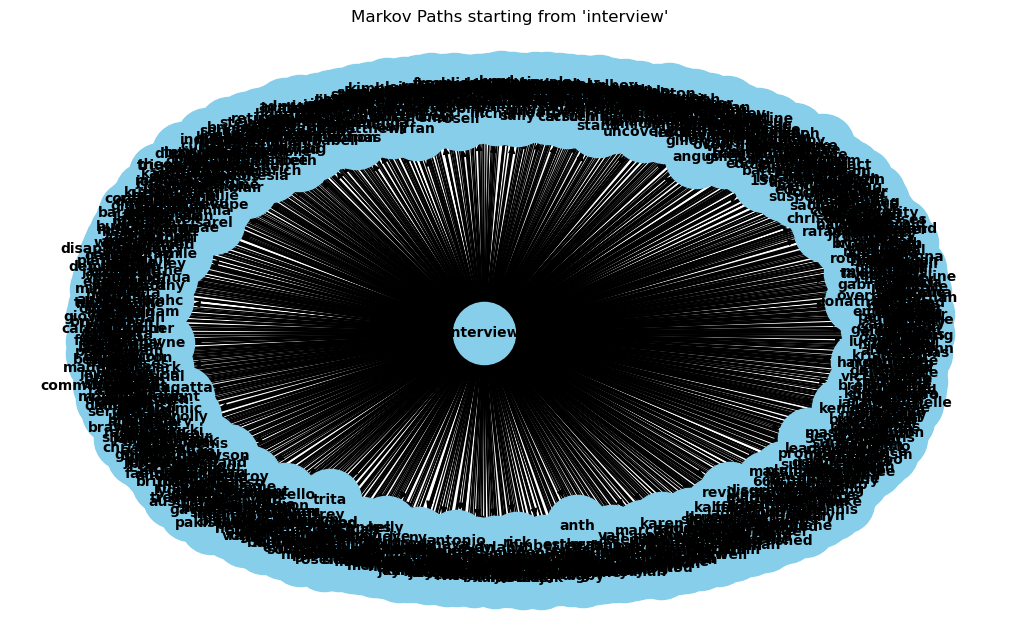

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

def visualize_word_chain(model, start_word, hops=2):
    G = nx.DiGraph()
    
    # Get the raw chain data
    chain_data = model.chain.model
    
    # Find all keys that start with our word
    # (Note: markovify keys are tuples like ('word1', 'word2'))
    current_layer = [key for key in chain_data.keys() if key[0] == start_word]
    
    # Build the graph
    for key in current_layer:
        word_from = key[0]
        # In state_size=2, the key is (word1, word2), and value is {next_word: prob}
        # We simplify to visualizing Word1 -> Word2
        word_to = key[1] 
        weight = len(chain_data[key]) # Approximation of weight
        
        G.add_edge(word_from, word_to, weight=weight)
    
    # Plotting
    plt.figure(figsize=(10, 6))
    pos = nx.spring_layout(G, k=0.5)
    nx.draw(G, pos, with_labels=True, node_color='skyblue', 
            node_size=2000, font_size=10, font_weight='bold', arrows=True)
    plt.title(f"Markov Paths starting from '{start_word}'")
    plt.show()


visualize_word_chain(model_combo, "")

In [64]:
# 1. Define keywords for specific topics
sports_words = ['win', 'score', 'game', 'match', 'cup', 'final', 'league', 'defeat', 'victory', 'cricket', 'football']
finance_words = ['market', 'dollar', 'price', 'rise', 'fall', 'rate', 'bank', 'economy', 'stock', 'tax', 'profit']

# 2. Filter the original dataframe based on these words
# We join the words with '|' which means "OR" in regex (e.g., "win|score|game")
sports_df = df[df['headline_text'].str.contains('|'.join(sports_words), case=False)]
finance_df = df[df['headline_text'].str.contains('|'.join(finance_words), case=False)]

print(f"Sports Dataset Size: {len(sports_df)} headlines")
print(f"Finance Dataset Size: {len(finance_df)} headlines")

# 3. Train specialized models
sports_model = markovify.NewlineText(sports_df.headline_text, state_size=2)
finance_model = markovify.NewlineText(finance_df.headline_text, state_size=2)

# 4. Compare the outputs
print("\n--- 🏈 Generated Sports News ---")
for _ in range(3):
    print(f"- {sports_model.make_sentence()}")

print("\n--- 💰 Generated Finance News ---")
for _ in range(3):
    print(f"- {finance_model.make_sentence()}")

Sports Dataset Size: 75102 headlines
Finance Dataset Size: 72255 headlines

--- 🏈 Generated Sports News ---
- lions desperate for win against pakistan a in tour match
- gazza chases a league decider
- sunshine coast bodybuilder wins state poll at start of finals contention with kangaroos

--- 💰 Generated Finance News ---
- truck and tractor market slumps on chinese factory activity boost strengthens hopes for mid west iron ore price party over
- pirated music on the rise
- housing optimism lifts us stocks inch up in flames


In [66]:
def check_originality(model, name, original_data, attempts=10):
    print(f"--- Checking {name} ---")
    duplicates = 0
    for i in range(attempts):
        sent = model.make_sentence()
        if sent:
            # Check if this exact sentence exists in the original data
            is_copy = sent in original_data.values
            
            if is_copy:
                print(f"COPY: {sent}")
                duplicates += 1
            else:
                print(f"NEW!: {sent}")
    
    print(f"Originality Score: {(attempts - duplicates) / attempts * 100}%\n")

# Compare your small model (state_size=2) vs your big model (state_size=4)
# Note: state_size=2 usually creates more original (but messier) text
#       state_size=4 usually creates mostly copies
check_originality(text_model, "State Size 2", df.headline_text)
check_originality(text_model3, "State Size 4", df.headline_text)

--- Checking State Size 2 ---
NEW!: trip aims to cut down
NEW!: students rally against climate change
NEW!: samoa surges in july
NEW!: afrikaners march to highlight water supply
NEW!: man charged over caloundra south estate
NEW!: herni van breda found guilty of sending porn to return to northern beef leader trish cowley
NEW!: seven arrested as part of the year at hopman
NEW!: wallabies brush aside challengers brisbane
NEW!: ambulance broke down while helping with innisfail clean up underway
NEW!: musical bait used to boost regional sa
Originality Score: 100.0%

--- Checking State Size 4 ---
NEW!: pub charity through the roof for edi rail
NEW!: jetstar cancels flights in and out of mental health facility
NEW!: former dpp stephen pallaras hits out at sa governments online betting tax
Originality Score: 100.0%



In [67]:
import datetime

date_str = datetime.date.today().strftime("%B %d, %Y")

print(f"========================================")
print(f"      THE DAILY MARKOV - {date_str}      ")
print(f"========================================\n")

print(f"TOP STORY:")
print(f"{model_combo.make_sentence().upper()}\n")

print(f"POLITICS:")
# Assuming you use the main model for general news
print(f"- {text_model.make_sentence()}")
print(f"- {text_model.make_sentence()}\n")

print(f"SPORTS CORNER:")
print(f"- {sports_model.make_sentence()}\n")

print(f"MARKET WATCH:")
print(f"- {finance_model.make_sentence()}\n")

print(f"========================================")

      THE DAILY MARKOV - November 26, 2025      

TOP STORY:
ACCUSED BOAT BLAST SEEKS PARDON REFUSAL REASON

POLITICS:
- should global streaming giants swans richmond gold coast southport beach in the studio with chris lynn
- afl interview robbie deans wallabies interview

SPORTS CORNER:
- service held for wind farm

MARKET WATCH:
- pope celebrates his 100th birthday



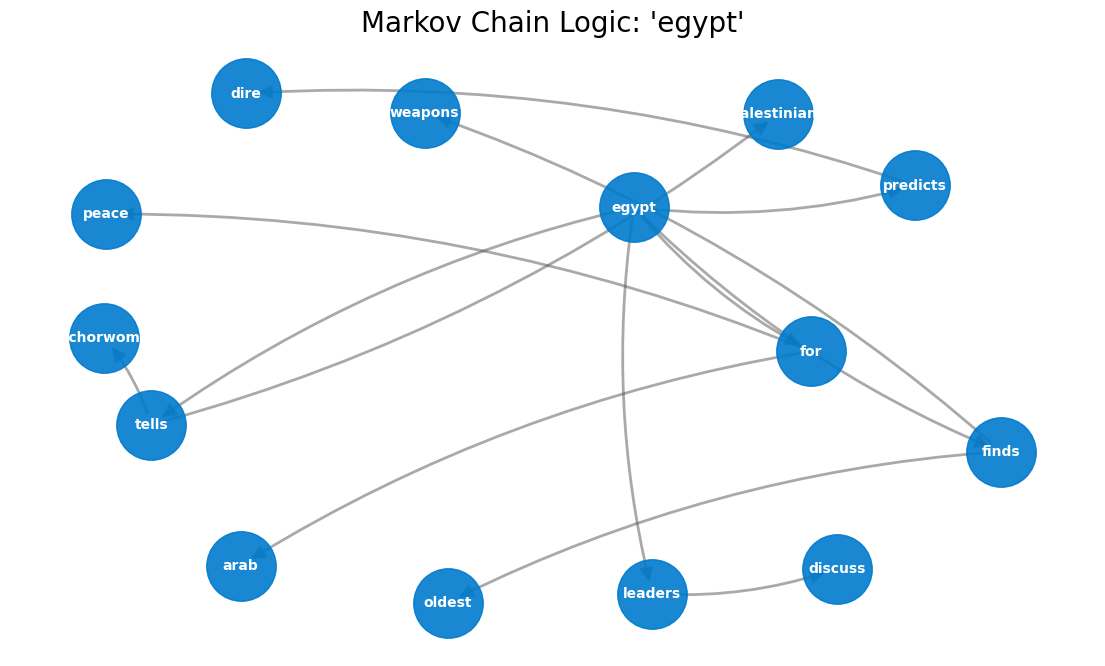

In [109]:
import networkx as nx
import matplotlib.pyplot as plt

def generate_banner(model, start_word, hops=10):
    G = nx.DiGraph()
    
    # Start exploring the chain
    current_word = start_word
    
    # We will simply follow the most probable path for visualization
    # or just grab a few random neighbors to show branching
    
    # Get raw chain
    chain_dict = model.chain.model
    
    # Find keys starting with our word
    # Note: Keys are tuples (word_a, word_b) -> {word_c: prob}
    relevant_keys = [k for k in chain_dict.keys() if k[0] == start_word]
    
    # Limit to first few for cleaner graph
    for key in relevant_keys[:5]: 
        word_a = key[0]
        word_b = key[1]
        G.add_edge(word_a, word_b)
        
        # Get next predictions
        next_words = chain_dict[key]
        for next_word in list(next_words.keys())[:2]: # Taking top 2 options
            G.add_edge(word_b, next_word)

    # Plot
    plt.figure(figsize=(14, 8))
    pos = nx.spring_layout(G, k=2, seed=42)
    
    nx.draw_networkx_nodes(G, pos, node_size=2500, node_color='#007acc', alpha=0.9)
    nx.draw_networkx_edges(G, pos, width=2, alpha=0.5, edge_color='#555555', arrowsize=20, connectionstyle='arc3,rad=0.1')
    nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif', font_weight='bold', font_color='white')
    
    plt.title(f"Markov Chain Logic: '{start_word}'", fontsize=20)
    plt.axis('off')
    plt.show()

# Run it!
generate_banner(text_model, "egypt")